In [2]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Loading & Preprocessing the Dataset

df = pd.read_csv("cleaned_student_depression_dataset.csv")
print(df.isnull().sum())
df.dropna(inplace=True)


id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [5]:
#Define Features & Target Variable
# Selecting numerical features
numerical_features = ["Age", "Academic Pressure", "Work Pressure", "CGPA", 
                      "Study Satisfaction", "Job Satisfaction", "Work/Study Hours", 
                      "Financial Stress"]

# Target variable
target = "Depression"

# Splitting features (X) and target (y)
X = df[numerical_features]
y = df[target]


In [6]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#Training the Linear Regression Model
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [9]:
# Making predictions on the test set
y_pred = lr_model.predict(X_test)

In [10]:
 #Evaluate Model Performance
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.15479469624938066
R² Score: 0.3644774159523111


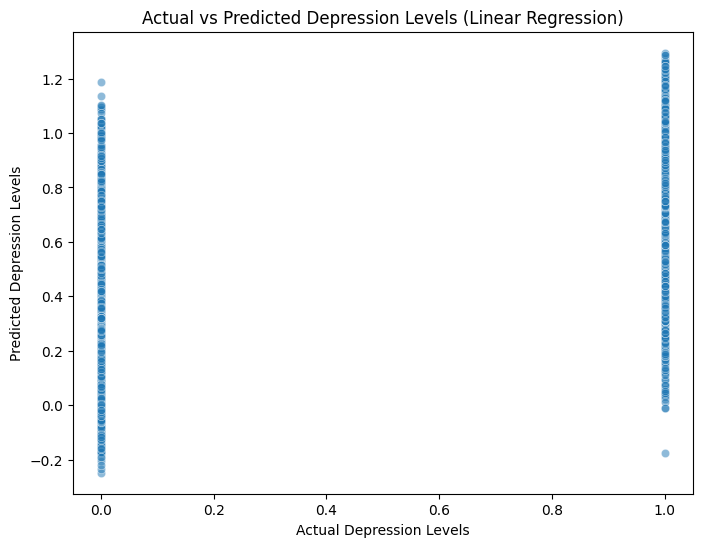

In [11]:
#Visualizing The Results

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Depression Levels")
plt.ylabel("Predicted Depression Levels")
plt.title("Actual vs Predicted Depression Levels (Linear Regression)")
plt.show()

Since depression is a binary classification problem (0 or 1), we will use a supervised classification model like Logistic Regression or Random Forest Classifier for better results.

In [12]:
#Importing Required Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [13]:
# Define feature columns and target variable
X = df[["Age", "Academic Pressure", "Work Pressure", "CGPA", 
        "Study Satisfaction", "Job Satisfaction", "Work/Study Hours", 
        "Financial Stress"]]
y = df["Depression"]  # Target variable (0 or 1)


In [14]:
# Split into training (80%) and testing (20%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [16]:
# Predict on the test data
y_pred = log_reg.predict(X_test)


Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.71      0.74      2343
           1       0.80      0.84      0.82      3238

    accuracy                           0.79      5581
   macro avg       0.78      0.78      0.78      5581
weighted avg       0.79      0.79      0.79      5581



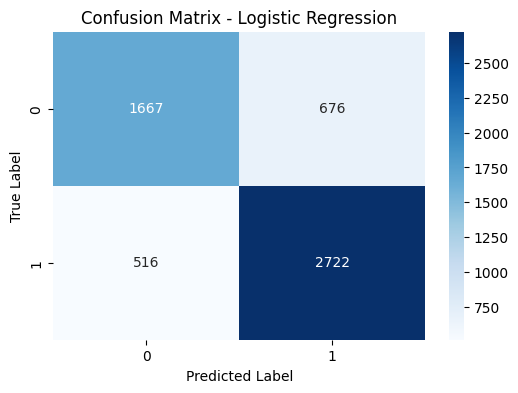

In [17]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Random Forest Accuracy: 0.76


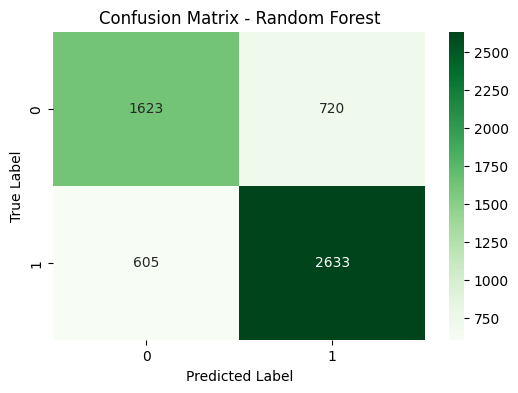

In [18]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Confusion Matrix for Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Classification analysis results:

Logistic Regression Accuracy: 79%


Random Forest Accuracy: 76%

Precision & Recall:

Class 0 (No Depression): 76% precision, 71% recall

Class 1 (Depression): 80% precision, 84% recall
